<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/TMS_nb/Lesson_28_practice_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

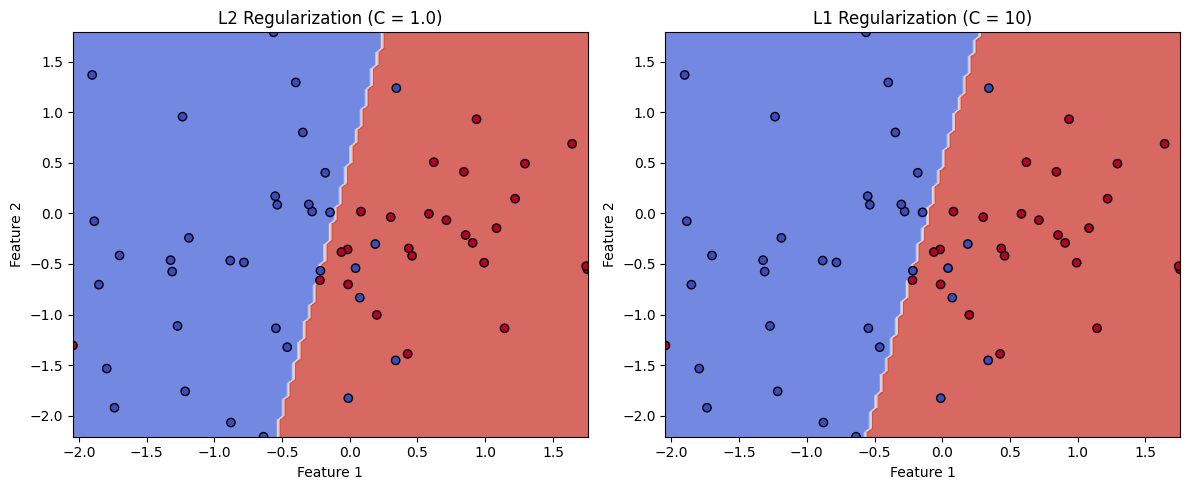

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Генерация данных
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели с L2 регуляризацией
C_l2 = 1.0  # Параметр регуляризации для L2
model_l2 = LogisticRegression(penalty='l2', C=C_l2)
model_l2.fit(X_train, y_train)

# Создание и обучение модели с L1 регуляризацией
C_l1 = 10  # Параметр регуляризации для L1
model_l1 = LogisticRegression(penalty='l1', C=C_l1, solver='saga')
model_l1.fit(X_train, y_train)

# Подготовка точек для графика
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))

# Получение предсказаний для графика
Z_l2 = model_l2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_l2 = Z_l2.reshape(xx.shape)

Z_l1 = model_l1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_l1 = Z_l1.reshape(xx.shape)

# Визуализация разделения и разделяющей границы
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_l2, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.title(f'L2 Regularization (C = {C_l2})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_l1, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.title(f'L1 Regularization (C = {C_l1})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 2ms/step


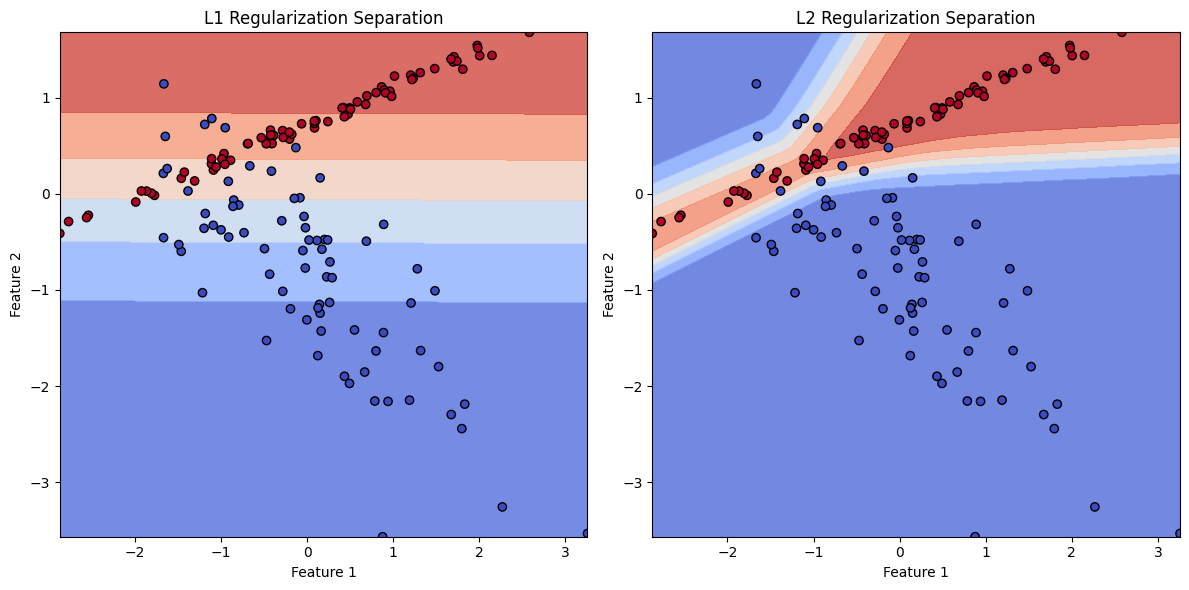

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Генерация данных
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение нейронной сети с L1 регуляризацией
model_l1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_l1.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Создание и обучение нейронной сети с L2 регуляризацией
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_l2.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Подготовка точек для графика
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Получение предсказаний для графика
Z_l1 = model_l1.predict(grid)
Z_l1 = Z_l1.reshape(xx.shape)

Z_l2 = model_l2.predict(grid)
Z_l2 = Z_l2.reshape(xx.shape)

# Визуализация разделения и разделяющей границы для L1 регуляризации
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_l1, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.title('L1 Regularization Separation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Визуализация разделения и разделяющей границы для L2 регуляризации
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_l2, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
plt.title('L2 Regularization Separation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


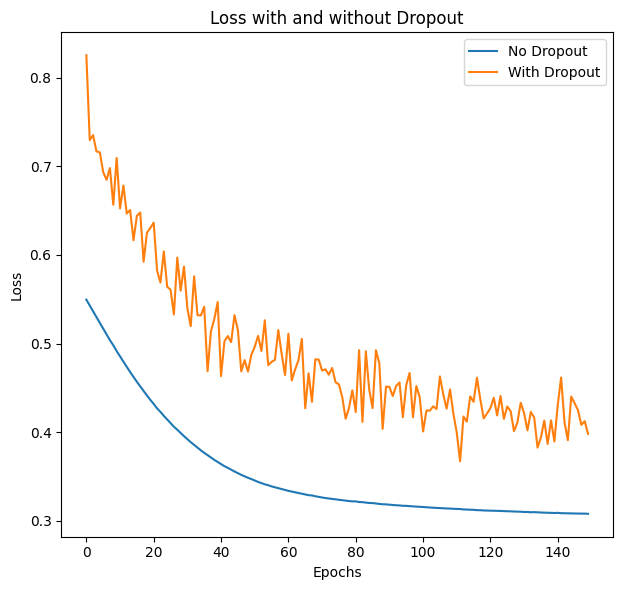

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Генерация данных
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание нейронной сети без Dropout
model_no_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_no_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание нейронной сети с Dropout
model_with_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение нейронных сетей и запись истории лосса
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

# Визуализация графиков лосса
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['loss'], label='No Dropout')
plt.plot(history_with_dropout.history['loss'], label='With Dropout')
plt.title('Loss with and without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


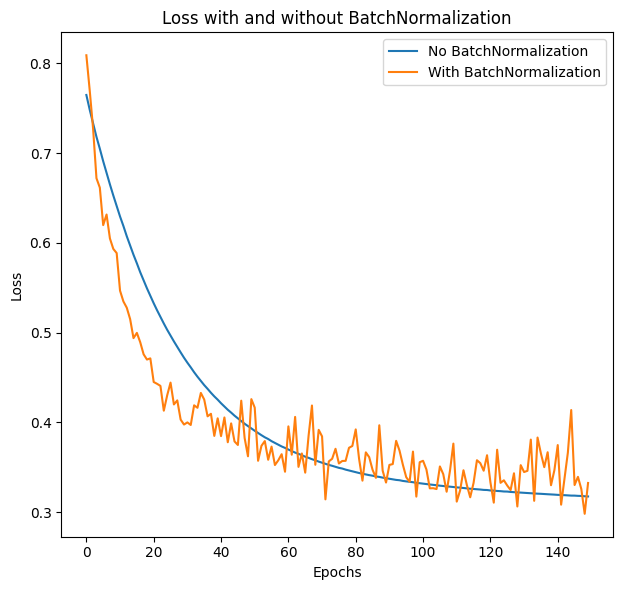

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Генерация данных
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание нейронной сети без BatchNormalization
model_no_bn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_no_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание нейронной сети с BatchNormalization
model_with_bn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kerne),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_with_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение нейронных сетей и запись истории лосса
history_no_bn = model_no_bn.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)
history_with_bn = model_with_bn.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

# Визуализация графиков лосса
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_no_bn.history['loss'], label='No BatchNormalization')
plt.plot(history_with_bn.history['loss'], label='With BatchNormalization')
plt.title('Loss with and without BatchNormalization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


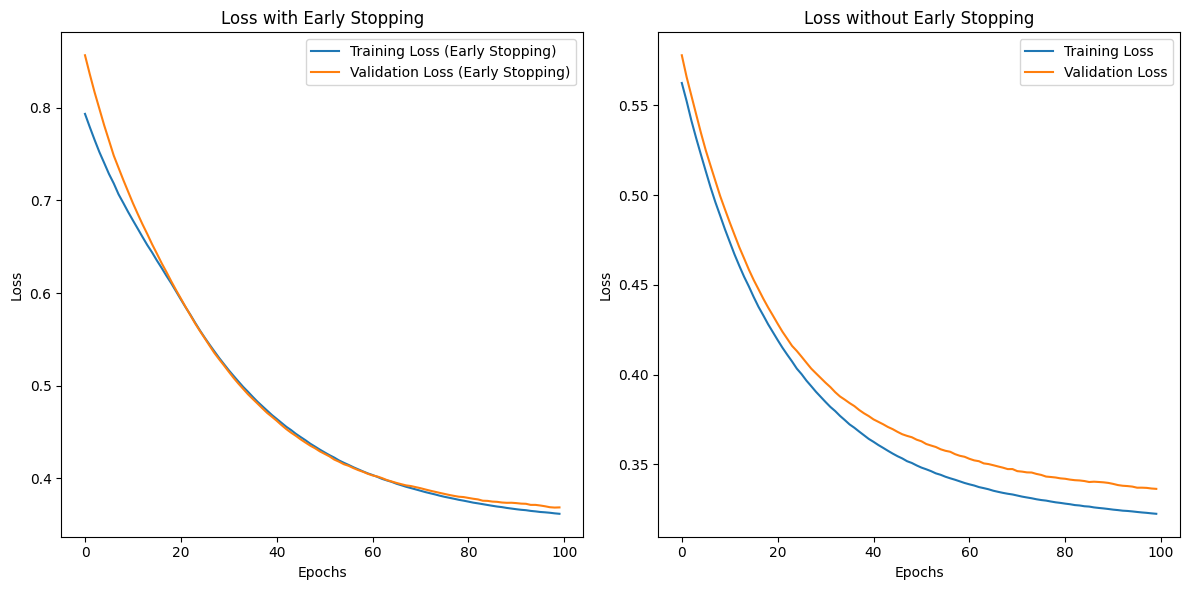

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Генерация данных
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание нейронной сети
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Создание callbacks для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Создание двух одинаковых нейронных сетей с ранней остановкой
model1 = create_model()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,
                      batch_size=16, verbose=0, callbacks=[early_stopping])

model2 = create_model()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,
                      batch_size=16, verbose=0)

# Визуализация графиков лосса с ранней остановкой и без
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss (Early Stopping)')
plt.plot(history1.history['val_loss'], label='Validation Loss (Early Stopping)')
plt.title('Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss without Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


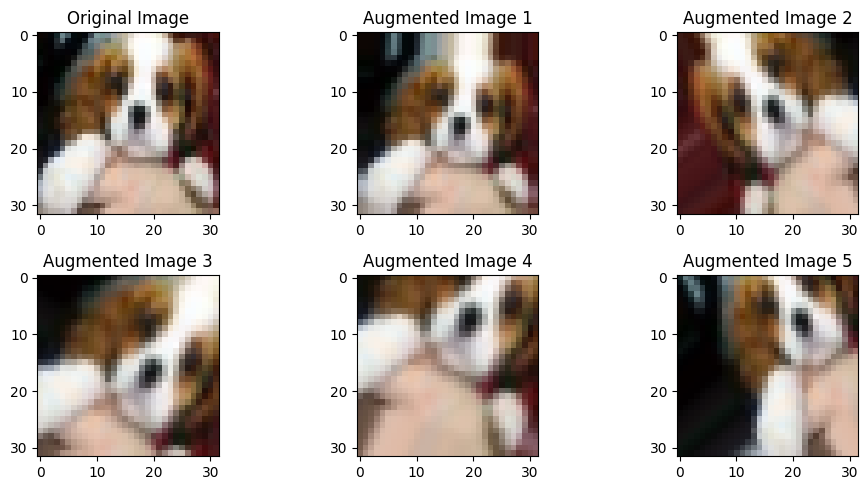

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

# Загрузка данных CIFAR-10
(x_train, _), (_, _) = cifar10.load_data()

# Выбор случайного изображения для аугментации
image_index = np.random.randint(0, x_train.shape[0])
image = x_train[image_index]

# Создание генератора аугментации
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Преобразование и отображение аугментированных изображений
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')

# Генерация и отображение аугментированных изображений
for i, augmented_image in enumerate(datagen.flow(np.expand_dims(image, axis=0), batch_size=1)):
    if i >= 5:  # Отобразить 5 аугментированных изображений
        break
    plt.subplot(2, 3, i + 2)
    plt.imshow(augmented_image[0].astype('uint8'))
    plt.title(f'Augmented Image {i+1}')

plt.tight_layout()
plt.show()

# Bonus

## Sequential API (последовательный API):
Этот подход используется в библиотеке Keras, входящей в состав TensorFlow. Sequential API позволяет создавать нейронные сети, в которых слои добавляются последовательно друг за другом. Это наиболее простой способ создания моделей с одним входом и одним выходом.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Загрузка и предобработка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Создание генераторов данных для обучения и валидации
batch_size = 32
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='training')
validation_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='validation')

# Создание модели с помощью Sequential API
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели с использованием генераторов данных
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.7570 - accuracy: 0.1046 - val_loss: 1.4951 - val_accuracy: 0.0878
Epoch 2/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.4476 - accuracy: 0.0918 - val_loss: 1.3197 - val_accuracy: 0.0972
Epoch 3/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.3256 - accuracy: 0.0951 - val_loss: 1.2648 - val_accuracy: 0.1000
Epoch 4/10
1407/1407 [==============================] - 25s 17ms/step - loss: 1.2461 - accuracy: 0.0963 - val_loss: 1.2181 - val_accuracy: 0.0836
Epoch 5/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1962 - accuracy: 0.0990 - val_loss: 1.1778 - val_accuracy: 0.1224
Epoch 6/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1449 - accuracy: 0.0986 - val_loss: 1.1219 - val_accuracy: 0.0954
Epoch 7/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.1101 - accuracy: 0.0977 - val_loss: 1.0837 -

## Functional API (функциональный API):
Также предоставляемый библиотекой Keras, функциональный API позволяет создавать более сложные и гибкие модели. В отличие от последовательного API, здесь можно создавать модели с несколькими входами и/или выходами, а также делать более сложные манипуляции с данными между слоями.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Загрузка и предобработка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Создание генераторов данных для обучения и валидации
batch_size = 32
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='training')
validation_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='validation')

# Создание входного слоя для функциональной модели
input_layer = Input(shape=(32, 32, 3))

# Определение архитектуры модели с использованием функционального API
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

# Создание функциональной модели
model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели с использованием генераторов данных
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/10
1407/1407 [==============================] - 27s 19ms/step - loss: 1.7265 - accuracy: 0.1052 - val_loss: 1.5242 - val_accuracy: 0.0878
Epoch 2/10
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4551 - accuracy: 0.0926 - val_loss: 1.3916 - val_accuracy: 0.0600
Epoch 3/10
1407/1407 [==============================] - 27s 19ms/step - loss: 1.3167 - accuracy: 0.0921 - val_loss: 1.2165 - val_accuracy: 0.1130
Epoch 4/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.2451 - accuracy: 0.0955 - val_loss: 1.1755 - val_accuracy: 0.0600
Epoch 5/10
1407/1407 [==============================] - 29s 21ms/step - loss: 1.1820 - accuracy: 0.0968 - val_loss: 1.1821 - val_accuracy: 0.1200
Epoch 6/10
1407/1407 [==============================] - 39s 27ms/step - loss: 1.1331 - accuracy: 0.0964 - val_loss: 1.0987 - val_accuracy: 0.0782
Epoch 7/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.0845 - accuracy: 0.0977 - val_loss: 1.0797 -

```python
import tensorflow as tf

# Создание входного тензора
input_layer = tf.keras.layers.Input(shape=(128,))

# Слои для первого пути
dense1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
dense2 = tf.keras.layers.Dense(32, activation='relu')(dense1)

# Слои для второго пути
conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(conv1)
flatten = tf.keras.layers.Flatten()(conv2)

# Объединение выходов слоев с помощью конкатенации
concatenated = tf.keras.layers.Concatenate()([dense2, flatten])

# Добавление дополнительных слоев
dense3 = tf.keras.layers.Dense(128, activation='relu')(concatenated)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(dense3)

# Создание модели
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели и обучение
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

```

## Subclassing API (API наследования):
В TensorFlow можно создавать модели, наследуясь от классов tf.keras.Model и tf.keras.layers.Layer. Этот способ предоставляет максимальную гибкость при создании моделей, но также требует более глубокого понимания работы фреймворка.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Загрузка и предобработка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Создание генераторов данных для обучения и валидации
batch_size = 32
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='training')
validation_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='validation')

# Создание пользовательского класса модели с использованием Subclassing API
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')
        self.pool3 = tf.keras.layers.MaxPooling2D((2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Создание экземпляра модели
model = MyModel()

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели с использованием генераторов данных
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/10
1407/1407 [==============================] - 25s 17ms/step - loss: 1.7377 - accuracy: 0.0999 - val_loss: 1.5015 - val_accuracy: 0.0806
Epoch 2/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.4411 - accuracy: 0.0944 - val_loss: 1.3292 - val_accuracy: 0.1204
Epoch 3/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.3155 - accuracy: 0.0952 - val_loss: 1.2441 - val_accuracy: 0.0800
Epoch 4/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.2442 - accuracy: 0.0970 - val_loss: 1.1549 - val_accuracy: 0.1036
Epoch 5/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.1777 - accuracy: 0.0995 - val_loss: 1.1993 - val_accuracy: 0.0674
Epoch 6/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.1357 - accuracy: 0.0977 - val_loss: 1.1359 - val_accuracy: 0.1288
Epoch 7/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.1035 - accuracy: 0.0982 - val_loss: 1.0610 -

## PyTorch:
В библиотеке PyTorch модели создаются путем определения классов, которые наследуются от torch.nn.Module. Операции между слоями задаются в методе forward, что позволяет более явно контролировать поток данных в модели.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Определение класса модели
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(in_features=16 * 16 * 16, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 16 * 16 * 16)
        x = self.fc(x)
        return x

# Загрузка и предобработка данных CIFAR-10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

# Создание экземпляра модели
net = SimpleCNN()

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Обучение модели
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


Files already downloaded and verified
[1,  2000] loss: 1.748
[1,  4000] loss: 1.497
[1,  6000] loss: 1.405
[1,  8000] loss: 1.360
[1, 10000] loss: 1.355
[1, 12000] loss: 1.317
[2,  2000] loss: 1.203
[2,  4000] loss: 1.234
[2,  6000] loss: 1.206
[2,  8000] loss: 1.216
[2, 10000] loss: 1.235
[2, 12000] loss: 1.176
[3,  2000] loss: 1.106
[3,  4000] loss: 1.119
[3,  6000] loss: 1.132
[3,  8000] loss: 1.131
[3, 10000] loss: 1.135
[3, 12000] loss: 1.144
[4,  2000] loss: 1.039
[4,  4000] loss: 1.058
[4,  6000] loss: 1.072
[4,  8000] loss: 1.069
[4, 10000] loss: 1.086
[4, 12000] loss: 1.099
[5,  2000] loss: 0.995
[5,  4000] loss: 0.998
[5,  6000] loss: 1.065
[5,  8000] loss: 1.043
[5, 10000] loss: 1.056
[5, 12000] loss: 1.068
Finished Training


В этом примере мы создаем класс модели SimpleCNN, который наследуется от nn.Module. В методе forward мы определяем последовательность операций между слоями. Далее мы используем трансформации данных для загрузки и предобработки данных CIFAR-10, создаем экземпляр модели, определяем функцию потерь и оптимизатор, и выполняем обучение модели на данных.

## TensorFlow 2.0+ с использованием Keras API:
TensorFlow 2.0+ предоставляет удобный интерфейс Keras для создания моделей, который объединяет последовательный и функциональный подходы. Это позволяет создавать модели с помощью методов из Keras API, но при этом имея все преимущества TensorFlow.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создание генератора данных
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Загрузка данных CIFAR-10
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

# Разделение данных на обучающий и валидационный наборы
train_generator = datagen.flow(train_data, train_labels, subset='training')
val_generator = datagen.flow(train_data, train_labels, subset='validation')

# Создание модели с использованием Keras API
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели с использованием генератора данных
model.fit(train_generator, epochs=5, validation_data=val_generator)

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_data / 255.0, test_labels)
print("Test accuracy:", test_acc)


Epoch 1/5
1407/1407 [==============================] - 22s 15ms/step - loss: 1.7770 - accuracy: 0.1060 - val_loss: 1.6058 - val_accuracy: 0.0660
Epoch 2/5
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5841 - accuracy: 0.0968 - val_loss: 1.5233 - val_accuracy: 0.1298
Epoch 3/5
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5312 - accuracy: 0.0946 - val_loss: 1.4770 - val_accuracy: 0.0876
Epoch 4/5
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4977 - accuracy: 0.0933 - val_loss: 1.4927 - val_accuracy: 0.1032
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.3362 - accuracy: 0.0685
Test accuracy: 0.06849999725818634


## MXNet:
В MXNet модели также создаются путем определения классов, а операции между слоями задаются в методе forward. Этот фреймворк также предоставляет удобные инструменты для построения и обучения нейронных сетей.

In [ ]:
import mxnet as mx
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms

# Загрузка данных CIFAR-10
transform_train = transforms.Compose([
    transforms.RandomFlipLeftRight(),
    transforms.RandomColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.RandomLighting(0.1),
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)
])
train_data = datasets.CIFAR10(train=True).transform_first(transform_train)
test_data = datasets.CIFAR10(train=False).transform_first(transform_test)

# Создание итераторов для обучения и тестирования
batch_size = 64
train_loader = gluon.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = gluon.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Определение модели и других параметров (как в предыдущем примере)

# Обучение модели
epochs = 5
for epoch in range(epochs):
    for data, label in train_loader:
        data = data.as_in_context(mx.cpu())
        label = label.as_in_context(mx.cpu())
        with autograd.record():
            output = net(data)
            loss = criterion(output, label)
        loss.backward()
        optimizer.step(batch_size)
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, epochs, loss.mean().asscalar()))

# Оценка модели на тестовых данных
correct = 0
total = 0
for data, label in test_loader:
    data = data.as_in_context(mx.cpu())
    label = label.as_in_context(mx.cpu())
    output = net(data)
    predictions = nd.argmax(output, axis=1)
    correct += nd.sum(predictions == label)
    total += data.shape[0]

accuracy = (correct / total) * 100
print("Test Accuracy: {:.2f}%".format(accuracy.asscalar()))


C:\Users\Sidromnik\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\mxnet\numpy\utils.py:37: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  bool = onp.bool


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations